In [26]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
data = pd.read_csv('../Data/datos_previos_clean.csv',index_col=0)

In [28]:
data.head()

,tipo_propiedad,Provincia,Zona,Localidad,Barrio,place_name,cochera,gimnasio,piscina,SUM,...,balcon,patio,parrilla,floor,rooms,price_usd,sup_cub,sup_descub,sup_total,price_usd_per_m2
0,PH,Capital Federal,CABA,Capital Federal,Mataderos,Mataderos,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2.0,62000.0,40.0,15.0,55.0,1127.272727
1,apartment,Buenos Aires Costa Atlántica,BsAs,Mar del Plata,Centro,Centro,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,2.0,64000.0,35.0,0.0,35.0,1828.571429
2,PH,Bs.As. G.B.A. Zona Norte,GBA,Vicente López,Munro,Munro,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,3.0,130000.0,78.0,28.0,106.0,1226.415094
3,apartment,Capital Federal,CABA,Capital Federal,Belgrano,Belgrano,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,NaN,1.0,138000.0,40.0,5.0,45.0,3066.666667
4,apartment,Bs.As. G.B.A. Zona Norte,GBA,San Isidro,Martínez,Martínez,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,NaN,2.0,115000.0,36.0,3.0,39.0,2948.717949


In [29]:
data.columns

Index(['tipo_propiedad', 'Provincia', 'Zona', 'Localidad', 'Barrio',
       'place_name', 'cochera', 'gimnasio', 'piscina', 'SUM', 'laundry',
       'balcon', 'patio', 'parrilla', 'floor', 'rooms', 'price_usd', 'sup_cub',
       'sup_descub', 'sup_total', 'price_usd_per_m2'],
      dtype='object')

In [30]:
data['Provincia'].unique()

array(['Capital Federal', 'Buenos Aires Costa Atlántica',
       'Bs.As. G.B.A. Zona Norte', 'Bs.As. G.B.A. Zona Oeste', 'Córdoba',
       'Bs.As. G.B.A. Zona Sur', 'Santa Fe', 'Misiones', 'Entre Ríos',
       'Buenos Aires Interior', 'Río Negro', 'Mendoza', 'Corrientes',
       'Tucumán', 'Salta', 'Neuquén', 'Chubut', 'Chaco', 'San Luis',
       'Tierra Del Fuego', 'Santa Cruz', 'La Pampa', 'Catamarca', 'Jujuy',
       'San Juan', 'La Rioja', 'Santiago Del Estero'], dtype=object)

In [31]:
data['Zona'].unique()

array(['CABA', 'BsAs', 'GBA', 'Córdoba', 'Santa Fe', 'Resto País'],
      dtype=object)

In [32]:
print(data['Provincia'].value_counts(sort=True)[0:8].reset_index()['index'].values)
print()
#print(data['Provincia'].value_counts(sort=True)[0:8])
print(data['Provincia'].value_counts(sort=True))

['Capital Federal' 'Bs.As. G.B.A. Zona Norte' 'Bs.As. G.B.A. Zona Oeste'
 'Buenos Aires Costa Atlántica' 'Bs.As. G.B.A. Zona Sur' 'Córdoba'
 'Santa Fe' 'Buenos Aires Interior']

Capital Federal                 12142
Bs.As. G.B.A. Zona Norte        11684
Bs.As. G.B.A. Zona Oeste         4650
Buenos Aires Costa Atlántica     4450
Bs.As. G.B.A. Zona Sur           4090
Córdoba                          2605
Santa Fe                         2593
Buenos Aires Interior             643
Corrientes                        218
Neuquén                           152
Río Negro                         137
Mendoza                           125
Misiones                          118
San Luis                           95
Chubut                             78
Entre Ríos                         39
Salta                              39
Tucumán                            35
Tierra Del Fuego                   16
Santa Cruz                         10
Chaco                               9
La Pampa                

In [97]:
a = pd.DataFrame(data['Provincia'].value_counts(sort=True)[0:8]).reset_index()
datos_por_prov = a.copy()
datos_por_prov['Prov'] = datos_por_prov['index']
datos_por_prov['Datos'] = datos_por_prov['Provincia']
datos_por_prov.drop(columns=['index','Provincia'],inplace=True)
datos_por_prov.rename(columns={'Prov':'Provincia'},inplace=True)
datos_por_prov.sort_values(by='Datos',ascending=True,inplace=True)
datos_por_prov = datos_por_prov.reset_index().drop(columns=['index'])
datos_por_prov

,Provincia,Datos
0,Buenos Aires Interior,643
1,Santa Fe,2593
2,Córdoba,2605
3,Bs.As. G.B.A. Zona Sur,4090
4,Buenos Aires Costa Atlántica,4450
5,Bs.As. G.B.A. Zona Oeste,4650
6,Bs.As. G.B.A. Zona Norte,11684
7,Capital Federal,12142


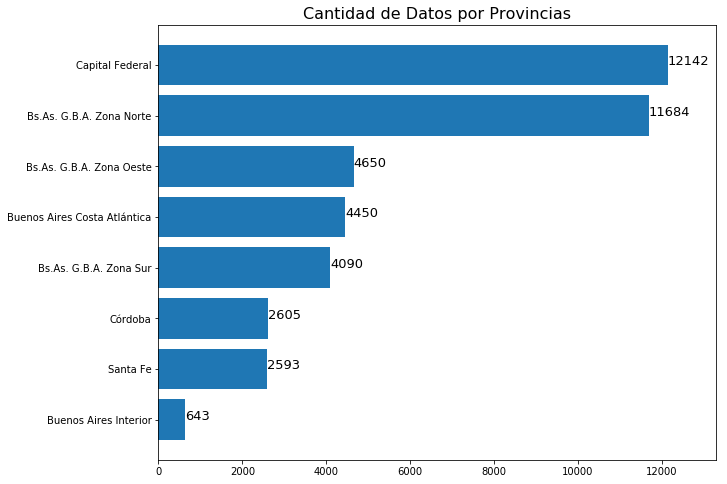

In [110]:
plt.figure(figsize=(10,8))
plt.barh(y=datos_por_prov['Provincia'],width=datos_por_prov['Datos'])
for i,v in enumerate(datos_por_prov['Provincia']):
    plt.text(datos_por_prov['Datos'][i],i,datos_por_prov['Datos'][i],fontsize=13)
plt.xlim([0,13300])
plt.title('Cantidad de Datos por Provincias',fontsize=16)
plt.savefig('../Images/Cant. de Datos por Provincias.png')

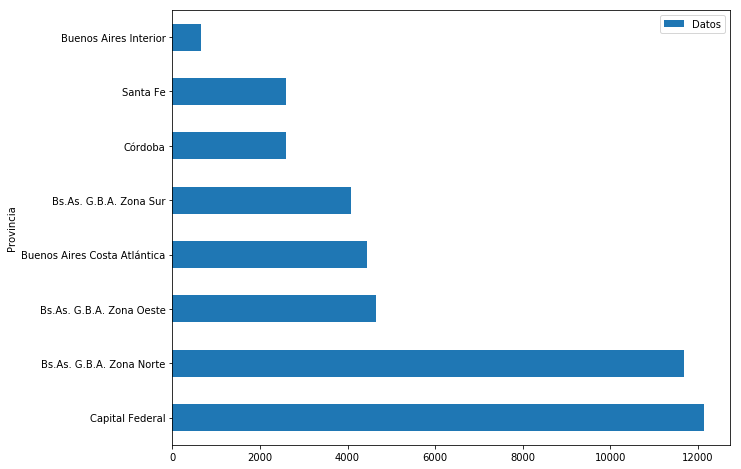

In [40]:
datos_por_prov.plot(kind='barh',y='Datos',x='Provincia',figsize=(10,8))

In [9]:
data['Zona'].value_counts(sort=True)

GBA           20424
CABA          12142
BsAs           5093
Córdoba        2605
Santa Fe       2593
Resto País     1084
Name: Zona, dtype: int64

In [9]:
data['Zona'].value_counts(sort=True).reset_index()['index'].values

array(['GBA', 'CABA', 'BsAs', 'Córdoba', 'Santa Fe', 'Resto País'],
      dtype=object)

In [10]:
capital_df=data.loc[data['Provincia']=='Capital Federal'].copy().reset_index().drop(columns='index')
gbanorte_df=data.loc[data['Provincia']=='Bs.As. G.B.A. Zona Norte'].copy().reset_index().drop(columns='index')
costa_df=data.loc[data['Provincia']=='Buenos Aires Costa Atlántica'].copy().reset_index().drop(columns='index')
gbasur_df=data.loc[data['Provincia']=='Bs.As. G.B.A. Zona Sur'].copy().reset_index().drop(columns='index')
gbaoeste_df=data.loc[data['Provincia']=='Bs.As. G.B.A. Zona Oeste'].copy().reset_index().drop(columns='index')
cordoba_df=data.loc[data['Provincia']=='Córdoba'].copy().reset_index().drop(columns='index')
santafe_df=data.loc[data['Provincia']=='Santa Fe'].copy().reset_index().drop(columns='index')
bsasint_df=data.loc[data['Provincia']=='Buenos Aires Interior'].copy().reset_index().drop(columns='index')

In [11]:
capital_df.to_csv('../Data/data_capital.csv')
#gbanorte_df.to_csv('../Data/data_gbanorte.csv')
#gbaoeste_df.to_csv('../Data/data_gbaoeste.csv')
#gbasur_df.to_csv('../Data/data_gbasur.csv')
#costa_df.to_csv('../Data/data_costa.csv')
#cordoba_df.to_csv('../Data/data_cordoba.csv')
#santafe_df.to_csv('../Data/data_santafe.csv')
#bsasint_df.to_csv('../Data/data_bsasint.csv')

In [12]:
gba_df = data.loc[data['Zona']=='GBA'].copy().reset_index().drop(columns='index')
bsas_df = data.loc[data['Zona']=='BsAs'].copy().reset_index().drop(columns='index')
resto_df = data.loc[data['Zona']=='Resto País'].copy().reset_index().drop(columns='index')

gba_df.to_csv('../Data/data_todo_gba.csv')
#bsas_df.to_csv('../Data/data_resto_bsas.csv')
#resto_df.to_csv('../Data/data_resto_pais.csv')


In [14]:
combo_provs_df = data.loc[(data['Provincia']=='Buenos Aires Costa Atlántica')|(data['Provincia']=='Córdoba')|(data['Provincia']=='Santa Fe')|(data['Provincia']=='Buenos Aires Interior')].copy().reset_index().drop(columns='index')
combo_provs_df.to_csv('../Data/combo_provincias.csv')